In [1]:
# Importing libraries
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Extracting osm data using overpass query
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """ [out:json];
// gather results
(
  // query part for: “building=commercial”
  node["building"="commercial"](18.90043998607116,72.66769409179688,19.26188699098167,73.18267822265625);
  way["building"="commercial"](18.90043998607116,72.66769409179688,19.26188699098167,73.18267822265625);
  relation["building"="commercial"](18.90043998607116,72.66769409179688,19.26188699098167,73.18267822265625);
);
// print results
out body;
>;
out skel qt;
""" 
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [4]:
# Coordinates
coords = []
for element in data['elements']:
    if element['type'] == 'node':
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
    elif 'body' in element:
        lon = element['body']['lon']
        lat = element['body']['lat']
        coords.append((lon, lat))

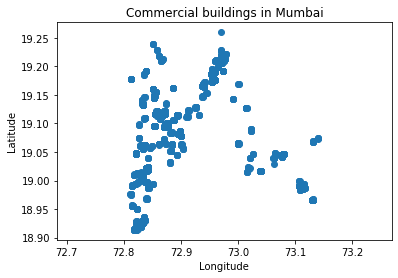

In [5]:
# Convert coordinates into numpy array
X = np.array(coords)

# Visualizing data
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Commercial buildings in Mumbai')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()